# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pprint
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
df = data[['firstname', 'race', 'call']]
df.head()

,firstname,race,call
0,Allison,w,0.0
1,Kristen,w,0.0
2,Lakisha,b,0.0
3,Latonya,b,0.0
4,Carrie,w,0.0


In [4]:
df.shape

(4870, 3)

In [5]:
# number of callbacks for white-sounding names
sum(df[df.race=='w'].call)

235.0

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

1. What test is appropriate for this problem? Does CLT apply?

    A permutation test to randomly reassign the data to two groups
    and see how likely it was that the observed difference happened by chance
    
    CLT applies sinces both np and n(1-p) are greater than 5 and n>30
    
2. What are the null and alternate hypotheses?

    Null Hypothesis: the true proportion of callbacks for black and white sounding names is the same, bp - wp = 0
    
    Alternate: bp - wp != 0 

In [6]:
bnames = df[df.race=='b']
wnames = df[df.race=='w']
bcalls = bnames[bnames.call==1]
wcalls = wnames[wnames.call==1]

n = len(df)
bn = len(bnames) 
wn = len(wnames)
p = sum(df.call) / len(df.call)
bp = len(bcalls)/len(bnames)
wp = len(wcalls)/len(wnames)

print(bp, wp, p, n)


0.06447638603696099 0.09650924024640657 0.08049281314168377 4870


In [12]:
b_var =  (bp * (1-bp))/bn
w_var = (wp * (1-wp))/wn
pooled_var = (p * (1 - p))/n

std_error = np.sqrt(b_var + w_var)
std_error_pooled = np.sqrt(2 * pooled_var)

b_std = np.sqrt(b_var)
w_std = np.sqrt(w_var)


std_error_pooled

0.005513236645169081

In [8]:
#95 confidence interval
[-2*std_error_pooled, 2*std_error_pooled]

[-0.011026473290338162, 0.011026473290338162]

In [13]:
diff = wp-bp
diff

0.032032854209445585

In [14]:
z = diff/std_error_pooled
z

5.810172185791092

That's a big Z score, well outside the 95% confidence interval. 
Hypothesis rejected

In [107]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [108]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [109]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [124]:
perm_reps = draw_perm_reps(bnames.call, wnames.call, diff_of_means, 10000)

perm_reps

array([-0.01149898, -0.00082136,  0.00574949, ..., -0.00574949,
       -0.00164271,  0.        ])

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

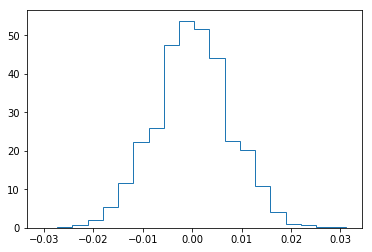

In [125]:
plt.hist(perm_reps, density=True, bins=20, histtype='step')
plt.show()

In [129]:
perm_reps_sorted = np.sort(perm_reps)
perm_reps_sorted

array([-0.03039015, -0.02874743, -0.02628336, ...,  0.02874743,
        0.02874743,  0.0312115 ])

In [131]:
interval = np.percentile(perm_reps_sorted, [2.5, 97.5])
interval

array([-0.01560576,  0.01478439])

In [132]:
diff

0.032032854209445585

In [ ]:
# difference is well outside the bootstrapped 95 interval

Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?